### Libraries Installation

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import torch
import torch.nn as nn
import requests
from pathlib import Path

import torchvision
from torchvision import transforms

In [2]:
# Device agnostic-code
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
    
device

'cpu'

In [3]:
data_path = Path("C:/Users/Germán/Documents/00 Proyectos/Greenly/TrashClassificationModel/data")
image_path = Path("C:/Users/Germán/Documents/00 Proyectos/Greenly/TrashClassificationModel/dataset-original") 

# If the folder doesn't exist, download it and prepare it
if image_path.is_dir():
    print(f"{image_path} directory already exist")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

Did not find C:\Users\Germán\Documents\00 Proyectos\Greenly\TrashClassificationModel\dataset-original directory, creating one...


### Becoming One With the data


In [4]:
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

walk_through_dir(image_path)

There are 0 directories and 0 images in C:\Users\Germán\Documents\00 Proyectos\Greenly\TrashClassificationModel\dataset-original


Veo que tengo una cantidad de archivos homogénea por lo que no debería tener error por sesgo

In [5]:
if image_path.is_dir():
    print(f"{data_path} directory already exist")
else:
    print(f"Did not find {data_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Train and Test paths
train_dir = data_path / "train"
test_dir = data_path / 'test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

C:\Users\Germán\Documents\00 Proyectos\Greenly\TrashClassificationModel\data directory already exist


In [6]:
classes = [d for d in os.listdir(image_path) if os.path.isdir(os.path.join(image_path, d))]
classes

[]

In [7]:
import shutil
from torch.utils.data import random_split

Función para copiar y dividir la data en train y test sets. Solo deberé utilizar esta función una vez. Por lo que podría en un futuro volverla un script aparte

In [8]:
def split_dataset(image_path, final_dataset_path):
    # Crear directorios de destino si no existen
    train_dir = os.path.join(final_dataset_path, 'train')
    test_dir = os.path.join(final_dataset_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Obtener las clases (subdirectorios) en el directorio original
    classes = [d for d in os.listdir(image_path) if os.path.isdir(os.path.join(image_path, d))]

    for class_name in classes:
        class_dir = os.path.join(image_path, class_name)
        images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

        # Dividir las imágenes en conjuntos de entrenamiento y prueba
        train_images, test_images = random_split(images, [0.8, 0.2])

        # Crear subdirectorios para cada clase en los directorios de entrenamiento y prueba
        train_class_dir = os.path.join(train_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        # Copiar imágenes al directorio de entrenamiento
        for image in train_images:
            src = os.path.join(class_dir, image)
            dst = os.path.join(train_class_dir, image)
            shutil.copyfile(src, dst)

        # Copiar imágenes al directorio de prueba
        for image in test_images:
            src = os.path.join(class_dir, image)
            dst = os.path.join(test_class_dir, image)
            shutil.copyfile(src, dst)

    print("Datos divididos correctamente en directorios de entrenamiento y prueba.")

In [39]:
# Ejecuto la Función

# split_dataset(image_path=image_path, final_dataset_path=data_path)

Text(0.5, 1.0, 'Image Class: glass | Image Shape: (3024, 4032, 3) -> [Height, Width, color_channels]')

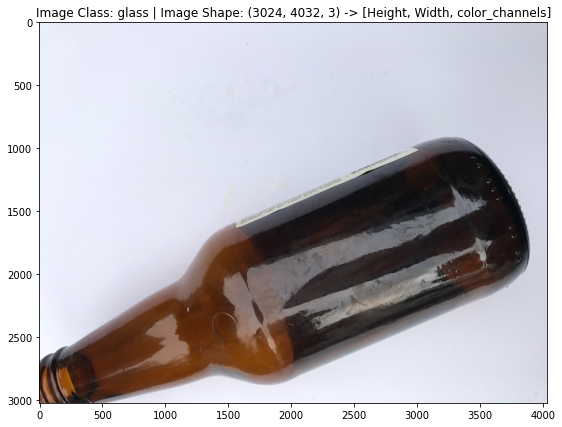

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Lista con Paths de todas la data (imagenes)
image_path_list = list(data_path.glob("*/*/*.jpg"))
# Eligo una aleatoria
random_image_path = random.choice(image_path_list)
# Busco la clase
image_class = random_image_path.parent.stem
# Obtengo la imagen
img = Image.open(random_image_path)

# Represento la imagen como array para utilizar numpy (ciencia de datos)
img_as_array = np.asarray(img)

# Plot
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image Class: {image_class} | Image Shape: {img_as_array.shape} -> [Height, Width, color_channels]")

### Transformo la Data

Para utilizar PyTorch necesito que las imágenes estén representadas en forma de tensores

In [10]:
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from PIL import Image

In [11]:
print(f"Numpy version: {np.__version__}")

Numpy version: 1.26.4


In [12]:
# Función de Transformación de la Data
data_transform = transforms.Compose([
    # Resize
    transforms.Resize((64,64)),
    # Random Flip -> Data Augmentation, probabilidad 50%
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a tensor
    transforms.ToTensor()
])

In [13]:
transformed_img = data_transform(img)

In [14]:
print(img)
print(img_as_array)
print(f"Shape before transforms: {img_as_array.shape}")
print(f"Shape after transforms: {transformed_img.shape}")

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4032x3024 at 0x15ACCD98FA0>
[[[234 240 252]
  [235 241 253]
  [235 241 253]
  ...
  [201 200 214]
  [201 200 214]
  [201 200 214]]

 [[235 241 253]
  [236 242 254]
  [236 242 254]
  ...
  [200 199 213]
  [200 199 213]
  [200 199 213]]

 [[238 242 254]
  [238 242 254]
  [238 242 254]
  ...
  [200 199 213]
  [200 199 213]
  [199 198 212]]

 ...

 [[251 255 253]
  [225 230 224]
  [150 149 144]
  ...
  [219 218 234]
  [218 217 233]
  [217 216 232]]

 [[243 252 249]
  [251 255 253]
  [192 194 189]
  ...
  [220 217 234]
  [219 216 233]
  [218 215 232]]

 [[247 255 254]
  [245 254 249]
  [205 210 206]
  ...
  [220 217 234]
  [219 216 233]
  [218 215 232]]]
Shape before transforms: (3024, 4032, 3)
Shape after transforms: torch.Size([3, 64, 64])


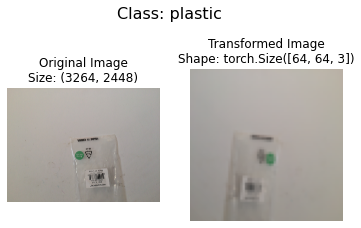

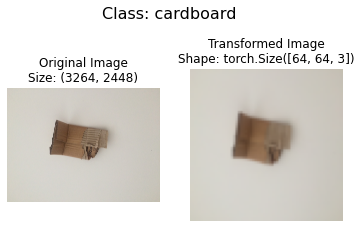

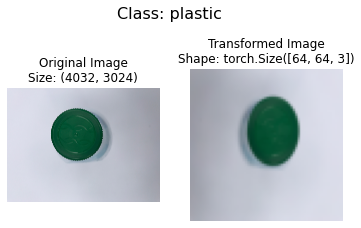

In [15]:
# Tomada directamente de Curso - Daniel Bourke

def plot_transformed_images(image_paths, transforms, n=3, seed=42):
  """ Selects random images form a path of images and loads/transforms
  them then plots the original vs the transformed version """

  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original Image\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transforms(f).permute(1,2,0) # NOTE: We'll need to change the shape (C,H,W) -> (H,W,C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed Image\nShape: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        data_transform,
                        n=3,
                        seed=28)

Transform data into dataset and then to dataloaders

In [17]:
import sys

project_root = Path("C:/Users/Germán/Documents/00 Proyectos/Greenly/TrashClassificationModel")
# Añadir el directorio raíz del proyecto a sys.path
sys.path.append(str(project_root))

# Importo helper_functions
from modules import helper_functions

In [18]:
from modules import data_setup

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transforms=data_transform,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS
)
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x15ac9eb19a0>,
 ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'])

Traigo los pesos del modelo preentrenado de MobileNet

In [19]:
import torch
import torchvision
import torchvision.models as models

# Obtengo los pesos del modelo MobileNet_v3_Large
weights = torchvision.models.MobileNet_V3_Large_Weights.DEFAULT
print(weights)

# Obtengo las transformaciones utilizadas para obtener esos pesos
auto_transforms = weights.transforms()
auto_transforms
print(auto_transforms)
# Otra forma de hacerlo sería

# nombre_modelo = "mobilenet_v3_large"

# modelo_clase = getattr(models, nombre_modelo)
# print(f"Clase de Modelo: {modelo_clase}")

# nombre_modelo = "MobileNet_V3_Large"   <---- PROBLEMA. Tengo que cambiar la Tipografía
# weights_class = getattr(models, f'{nombre_modelo}_Weights')
# print(f"Weights_class: {weights_class}")

# weights2 = weights_class.DEFAULT
# print(f"weights2: {weights2}")

MobileNet_V3_Large_Weights.IMAGENET1K_V2
ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.3338562..2.3611329].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.980906..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4285715].


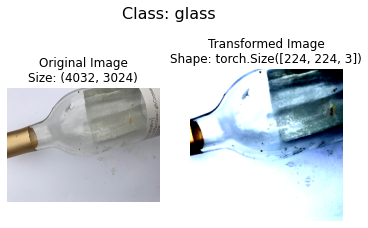

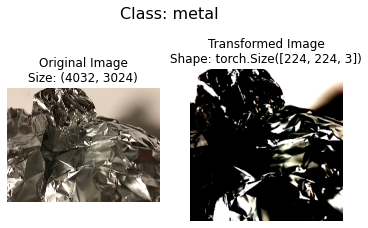

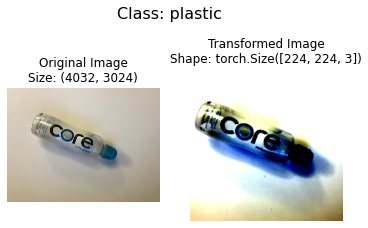

In [20]:
# Visualize auto_transforms in the data
plot_transformed_images(image_path_list,
                        auto_transforms, # <--Visualizo estas transformaciones
                        n=3,
                        seed=5)

auto_transforms es como las manual_transforms pero las primeras vienen con el modelo que elegimos.

El problema es que perdemos customization

In [21]:
# Lo mismo que antes pero esta vez con las transformaciones del modelo elegido

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transforms=auto_transforms,# <--- Cambia
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x15ad90c1820>,
 ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'])

In [22]:
len(train_dataloader), len(test_dataloader)

(64, 16)

Instanciamos el mmodelo, asignandole los parámetros del entrenamiento previo

In [23]:
model = torchvision.models.mobilenet_v3_large(weights=weights)
model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

veo que tengo out_features=1000. Pero para mi problema out_features = 6 (num_classes)

In [24]:
# Print a summary using torchinfo (uncomment for actual output)
import torchsummary
from torchsummary import summary

model.eval()

summary(model,
        input_size=(3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        batch_size=1,
        device=str(device)
        ) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 16, 112, 112]             432
       BatchNorm2d-2          [1, 16, 112, 112]              32
         Hardswish-3          [1, 16, 112, 112]               0
            Conv2d-4          [1, 16, 112, 112]             144
       BatchNorm2d-5          [1, 16, 112, 112]              32
              ReLU-6          [1, 16, 112, 112]               0
            Conv2d-7          [1, 16, 112, 112]             256
       BatchNorm2d-8          [1, 16, 112, 112]              32
  InvertedResidual-9          [1, 16, 112, 112]               0
           Conv2d-10          [1, 64, 112, 112]           1,024
      BatchNorm2d-11          [1, 64, 112, 112]             128
             ReLU-12          [1, 64, 112, 112]               0
           Conv2d-13            [1, 64, 56, 56]             576
      BatchNorm2d-14            [1, 64,

### Congelo los features y cambio los out_features 

In [25]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.features.parameters():
    param.requires_grad = False

In [26]:
# Set the manual seeds
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)
# print(output_shape)

# Recreate the classifier layer and seed it to the target device
model.classifier[-1] = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape,
                    bias=True)).to(device)

In [27]:
# Visualize
model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [28]:
model.eval()

summary(model,
        input_size=(3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        batch_size=1,
        device=str(device)
        ) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 16, 112, 112]             432
       BatchNorm2d-2          [1, 16, 112, 112]              32
         Hardswish-3          [1, 16, 112, 112]               0
            Conv2d-4          [1, 16, 112, 112]             144
       BatchNorm2d-5          [1, 16, 112, 112]              32
              ReLU-6          [1, 16, 112, 112]               0
            Conv2d-7          [1, 16, 112, 112]             256
       BatchNorm2d-8          [1, 16, 112, 112]              32
  InvertedResidual-9          [1, 16, 112, 112]               0
           Conv2d-10          [1, 64, 112, 112]           1,024
      BatchNorm2d-11          [1, 64, 112, 112]             128
             ReLU-12          [1, 64, 112, 112]               0
           Conv2d-13            [1, 64, 56, 56]             576
      BatchNorm2d-14            [1, 64,

Loss and Optimizer

In [29]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Entreno el modelo

In [63]:
# Set the random seeds
#torch.manual_seed(42)
#torch.cuda.manual_seed(42)

from modules import engine

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,\
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7742 | train_acc: 0.7273 | test_loss: 0.6865 | test_acc: 0.7628
Epoch: 2 | train_loss: 0.3848 | train_acc: 0.8707 | test_loss: 0.5332 | test_acc: 0.8182
Epoch: 3 | train_loss: 0.2802 | train_acc: 0.8874 | test_loss: 0.4890 | test_acc: 0.8438
Epoch: 4 | train_loss: 0.2116 | train_acc: 0.9306 | test_loss: 0.5301 | test_acc: 0.8425
Epoch: 5 | train_loss: 0.2268 | train_acc: 0.9215 | test_loss: 0.5474 | test_acc: 0.8386
[INFO] Total training time: 2199.266 seconds


In [64]:
project_root

WindowsPath('C:/Users/Germán/Documents/00 Proyectos/Greenly/trashClassification')

Saving the model

In [65]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path(project_root / "models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "mobilenetv3_large_v1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: C:\Users\Germán\Documents\00 Proyectos\Greenly\trashClassification\models\mobilenetv3_large_v1.pth


To Load the state_dict of the model we saved before

In [ ]:
# # Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# # Note: loading model will error if the shapes here aren't the same as the saved version
# loaded_model = FashionMNISTModelV2(input_shape=1, 
#                                     hidden_units=10, # try changing this to 128 and seeing what happens 
#                                     output_shape=10) 

# # Load in the saved state_dict()
# loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# # Send model to GPU
# loaded_model_2 = loaded_model_2.to(device)

In [66]:
results

{'train_loss': [0.7742006247863173,
  0.38475040695630014,
  0.2802283480996266,
  0.2116373736062087,
  0.22680316009791568],
 'train_acc': [0.7272677951388888,
  0.8707139756944444,
  0.8873697916666666,
  0.9305555555555556,
  0.9215494791666666],
 'test_loss': [0.686494167894125,
  0.5331651763990521,
  0.48900613375008106,
  0.530050708912313,
  0.5474205370992422],
 'test_acc': [0.7627840909090909,
  0.8181818181818182,
  0.84375,
  0.8425071022727273,
  0.8386008522727273]}

La siguiente casilla es temporal, descarga el archivo helper_functions pero ya lo tengo en modules.
https://www.learnpytorch.io/06_pytorch_transfer_learning/#5-evaluate-model-by-plotting-loss-curves

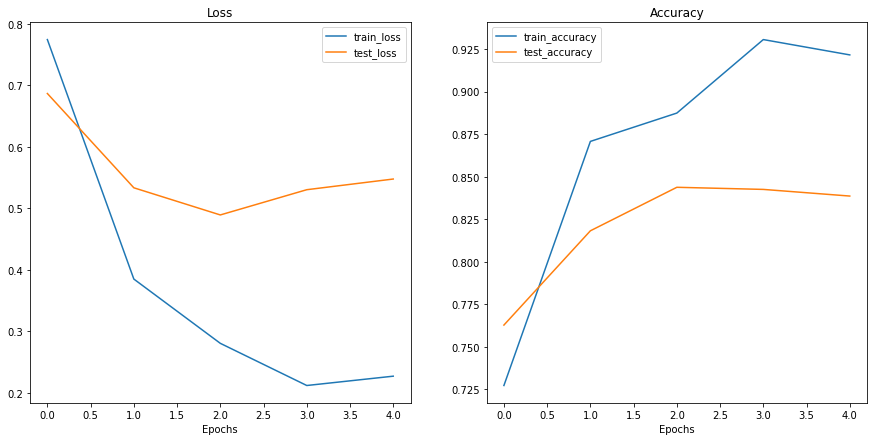

In [71]:
from modules import helper_functions

# Plot the loss curves of our model
helper_functions.plot_loss_curves(results)

Make Predictions on images from the test set

In [68]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str, 
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):
    
    
    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform

    # Esto lo tengo que cambiar y aplicar las mismas transformaciones que se utilizaron para MobileNet con auto_transform = weights.transforms()
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ### 

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability 
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

Get a random image from test set

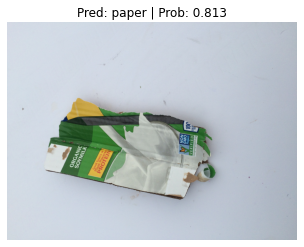

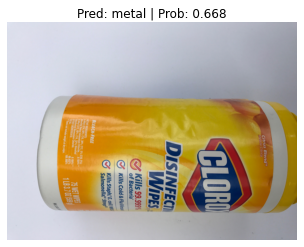

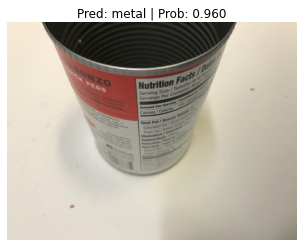

In [69]:
# Get a random list of image paths from test set
import random
num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.jpg")) # get list all image paths from test data 
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model, 
                        image_path=image_path,
                        class_names=class_names,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))

Prediction on custom image

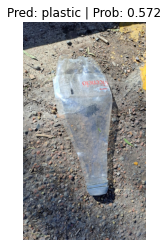

In [70]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = project_root / 'customdata' /"custom-plastic1.jpg"

# Predict on custom image
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names)